In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import balanced_accuracy_score
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

'''
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
'''

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
dementia_data = pd.read_csv('oasis_cross-sectional.csv')

In [3]:
dementia_data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
dementia_data['Delay'].value_counts()

2.0     3
40.0    2
3.0     2
5.0     2
1.0     2
39.0    1
89.0    1
24.0    1
21.0    1
28.0    1
12.0    1
10.0    1
64.0    1
20.0    1
Name: Delay, dtype: int64

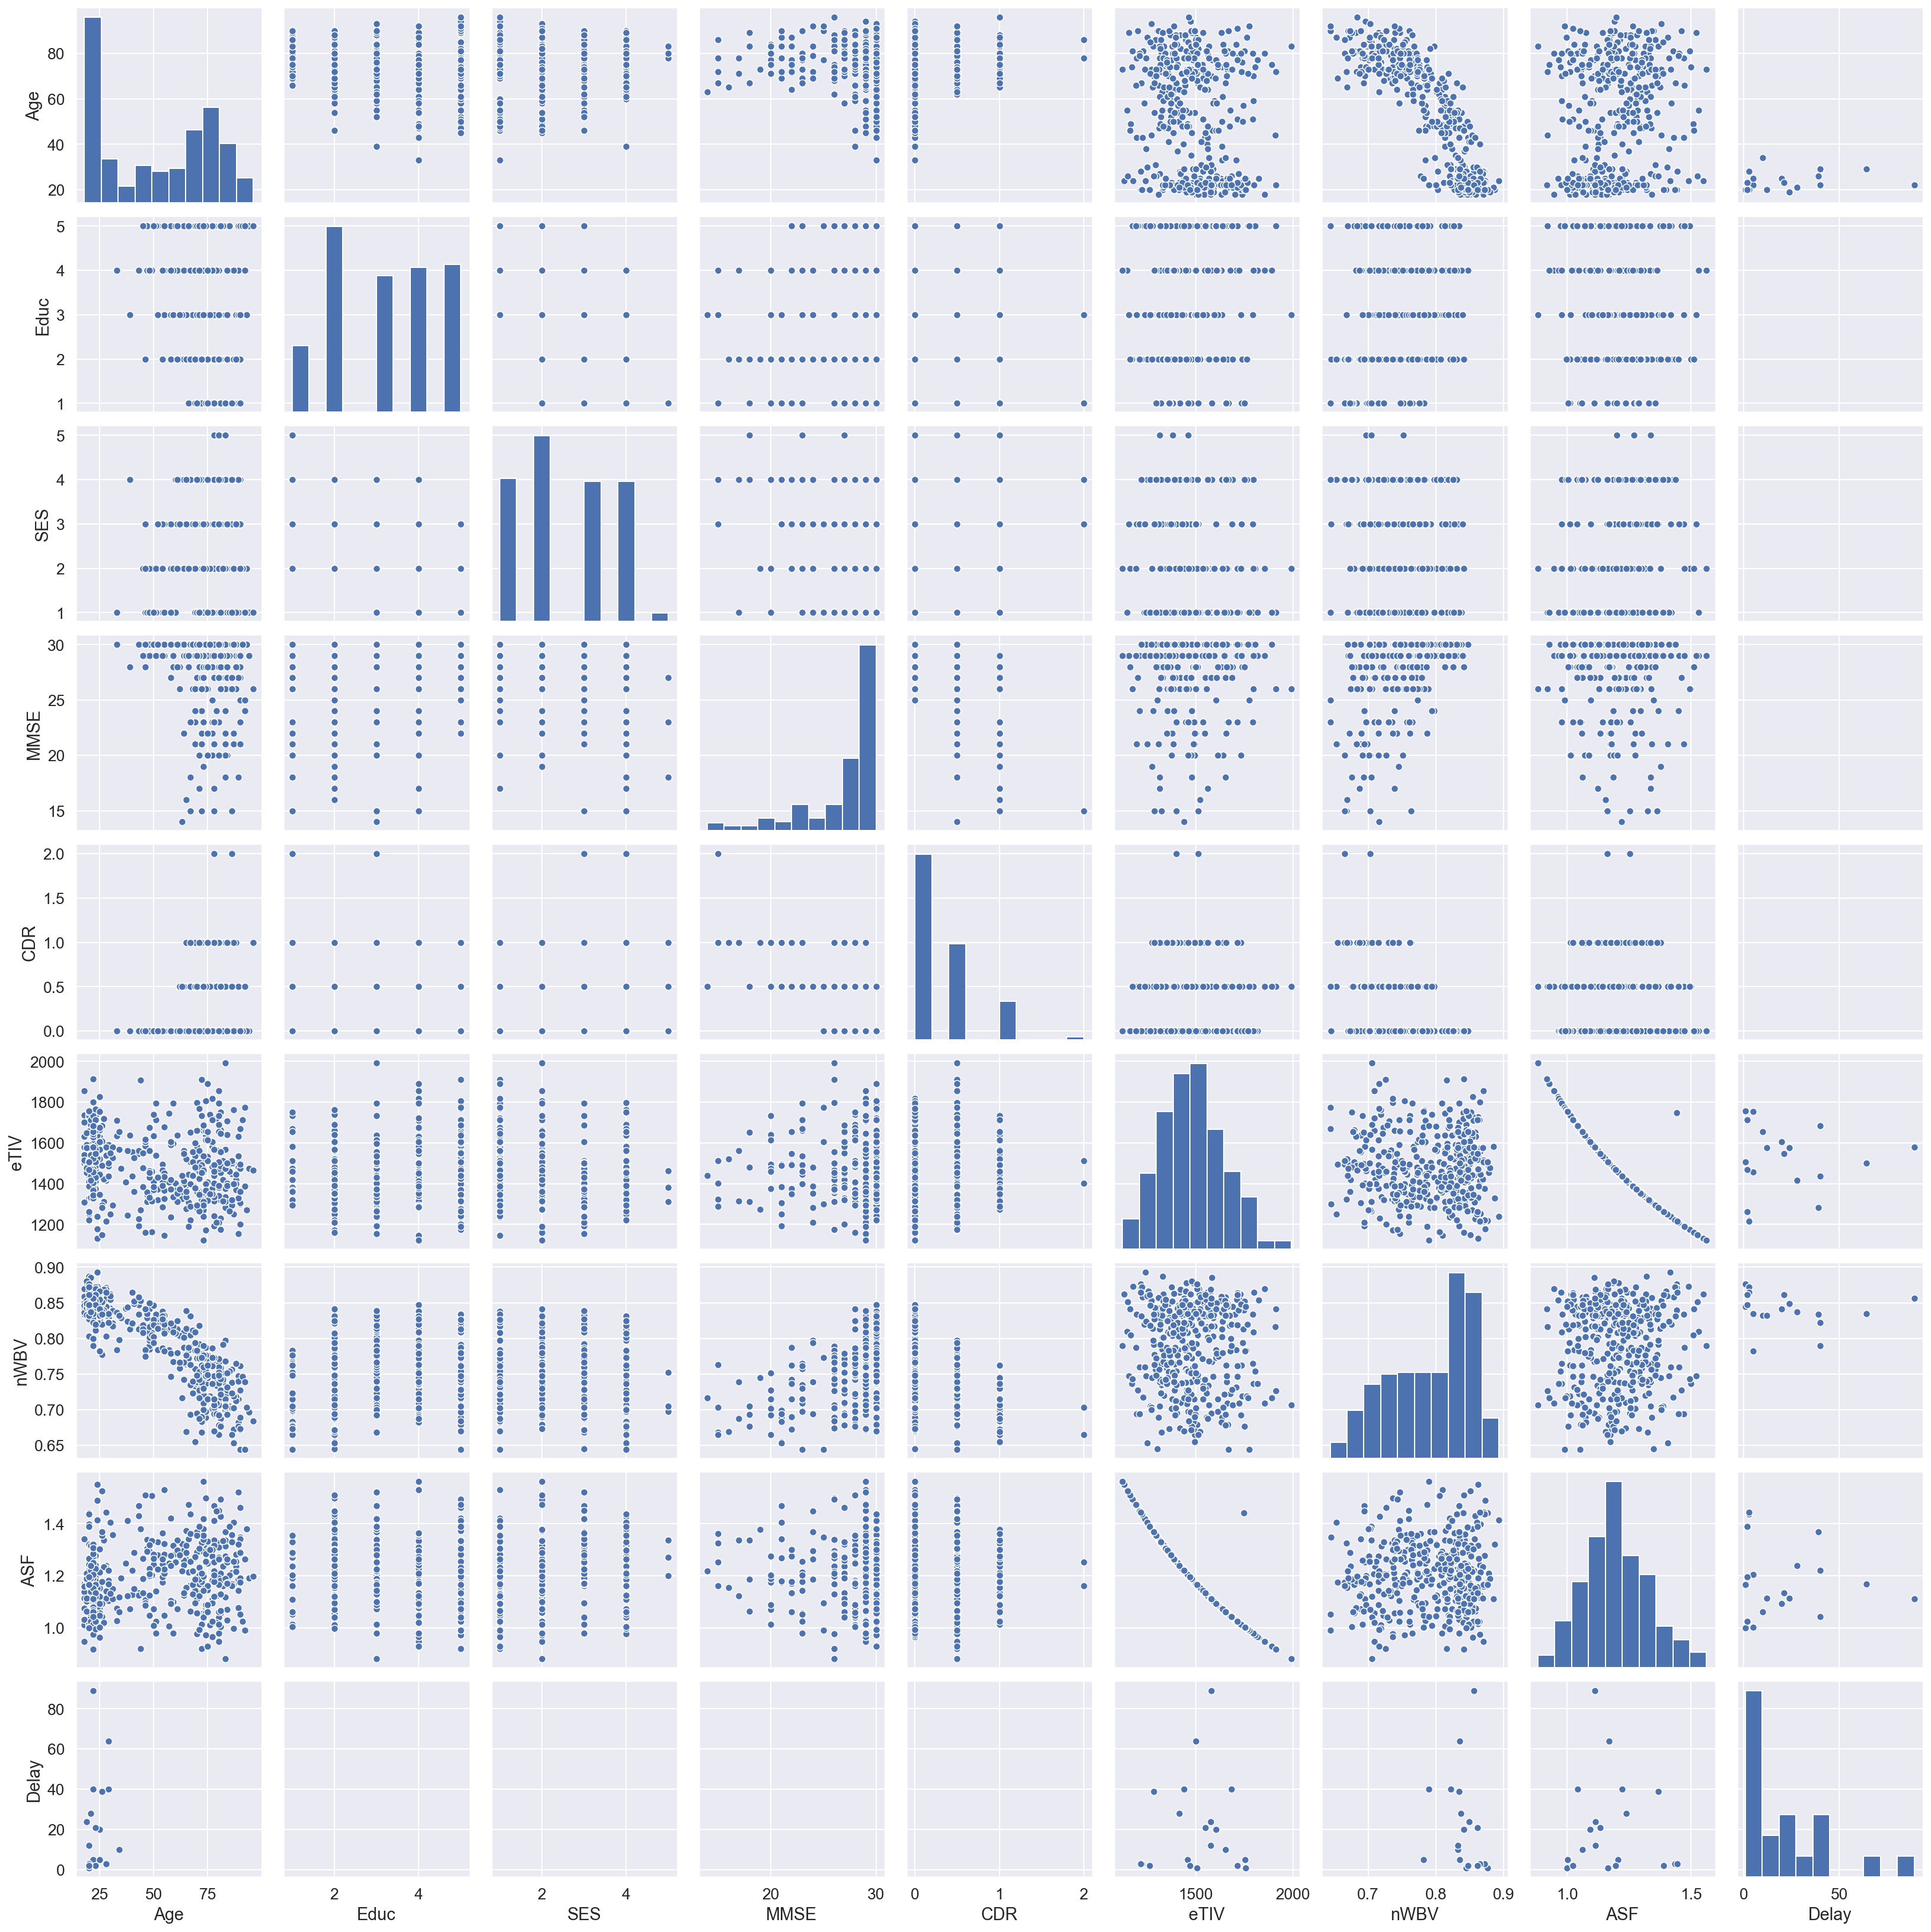

In [5]:
sns.pairplot(dementia_data)

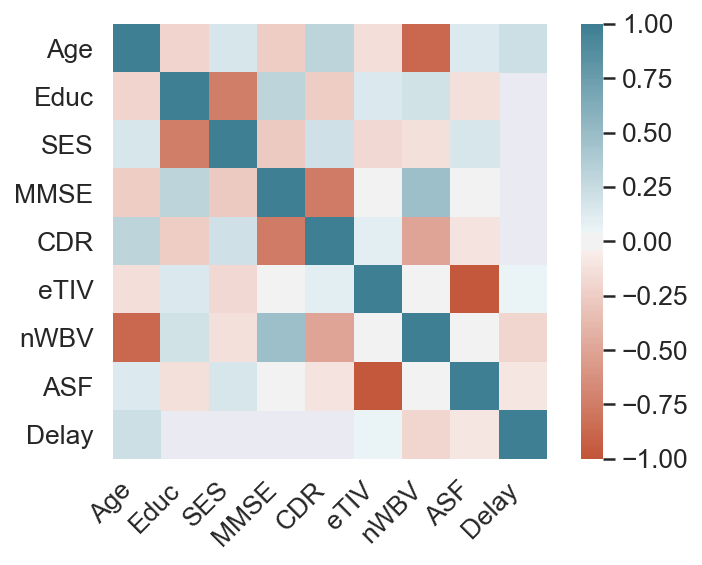

In [6]:

# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

corr = dementia_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
print (dementia_data.shape)

(436, 12)


In [8]:
dementia_data['nWBV'].describe()

count    436.000000
mean     0.791670  
std      0.059937  
min      0.644000  
25%      0.742750  
50%      0.809000  
75%      0.842000  
max      0.893000  
Name: nWBV, dtype: float64

In [9]:
dementia_long_data = pd.read_csv('oasis_longitudinal.csv')

In [10]:
dementia_long_data.head(20)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [11]:
print (dementia_long_data.shape)

(373, 15)


In [12]:
dementia_long_data = dementia_long_data[dementia_long_data['MMSE'].notna()]

In [13]:
print (dementia_long_data.shape)

(371, 15)


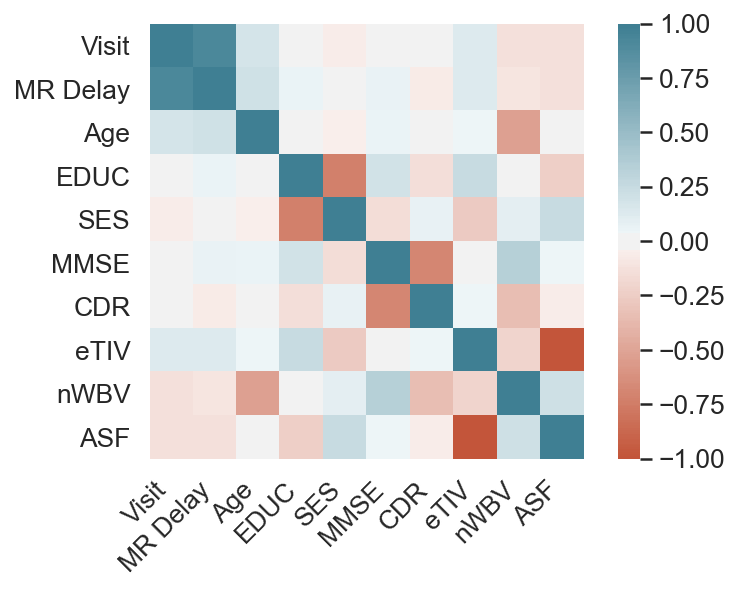

In [14]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

corr = dementia_long_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
#gk = dementia_long_data.groupby('Subject ID')
dementia_long_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    371 non-null object
MRI ID        371 non-null object
Group         371 non-null object
Visit         371 non-null int64
MR Delay      371 non-null int64
M/F           371 non-null object
Hand          371 non-null object
Age           371 non-null int64
EDUC          371 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           371 non-null float64
eTIV          371 non-null int64
nWBV          371 non-null float64
ASF           371 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 46.4+ KB


In [16]:
#gk.size()

In [17]:
dementia_data = dementia_data.drop(columns=['Delay'])

In [18]:
print (dementia_data.shape)

(436, 11)


In [19]:
#print (dementia_data)

In [20]:
dementia_data = dementia_data[dementia_data['MMSE'].notna()]

In [21]:
print (dementia_data.shape)

(235, 11)


In [22]:
dementia_data = dementia_data[dementia_data['CDR'].notna()]

In [23]:
print (dementia_data.shape)

(235, 11)


In [24]:
dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 415
Data columns (total 11 columns):
ID      235 non-null object
M/F     235 non-null object
Hand    235 non-null object
Age     235 non-null int64
Educ    235 non-null float64
SES     216 non-null float64
MMSE    235 non-null float64
CDR     235 non-null float64
eTIV    235 non-null int64
nWBV    235 non-null float64
ASF     235 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 22.0+ KB


In [25]:
print (dementia_data)

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0    OAS1_0001_MR1  F   R    74   2.0   3.0  29.0  0.0  1344  0.743  1.306
1    OAS1_0002_MR1  F   R    55   4.0   1.0  29.0  0.0  1147  0.810  1.531
2    OAS1_0003_MR1  F   R    73   4.0   3.0  27.0  0.5  1454  0.708  1.207
8    OAS1_0010_MR1  M   R    74   5.0   2.0  30.0  0.0  1636  0.689  1.073
9    OAS1_0011_MR1  F   R    52   3.0   2.0  30.0  0.0  1321  0.827  1.329
11   OAS1_0013_MR1  F   R    81   5.0   2.0  30.0  0.0  1664  0.679  1.055
13   OAS1_0015_MR1  M   R    76   2.0  NaN   28.0  0.5  1738  0.719  1.010
14   OAS1_0016_MR1  M   R    82   2.0   4.0  27.0  0.5  1477  0.739  1.188
16   OAS1_0018_MR1  M   R    39   3.0   4.0  28.0  0.0  1636  0.813  1.073
17   OAS1_0019_MR1  F   R    89   5.0   1.0  30.0  0.0  1536  0.715  1.142
18   OAS1_0020_MR1  F   R    48   5.0   2.0  29.0  0.0  1326  0.785  1.323
19   OAS1_0021_MR1  F   R    80   3.0   3.0  23.0  0.5  1794  0.765  0.978
20   OAS1_0022_MR1  F   R

In [26]:
dementia_data = dementia_data.reset_index(drop=True)

In [27]:
print (list(dementia_data.columns))

['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']


In [28]:
dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
ID      235 non-null object
M/F     235 non-null object
Hand    235 non-null object
Age     235 non-null int64
Educ    235 non-null float64
SES     216 non-null float64
MMSE    235 non-null float64
CDR     235 non-null float64
eTIV    235 non-null int64
nWBV    235 non-null float64
ASF     235 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.3+ KB


In [29]:
dementia_data.CDR.value_counts()

0.0    135
0.5    70 
1.0    28 
2.0    2  
Name: CDR, dtype: int64

In [30]:
dementia_data.CDR.unique()

array([0. , 0.5, 1. , 2. ])

In [31]:
#taking care of nan values in SES column socioeconomic status
dementia_data = dementia_data.fillna(method='ffill')

In [32]:
dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
ID      235 non-null object
M/F     235 non-null object
Hand    235 non-null object
Age     235 non-null int64
Educ    235 non-null float64
SES     235 non-null float64
MMSE    235 non-null float64
CDR     235 non-null float64
eTIV    235 non-null int64
nWBV    235 non-null float64
ASF     235 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.3+ KB


In [33]:
dementia_data.CDR = (dementia_data.CDR > 0).astype(int)

In [34]:
dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
ID      235 non-null object
M/F     235 non-null object
Hand    235 non-null object
Age     235 non-null int64
Educ    235 non-null float64
SES     235 non-null float64
MMSE    235 non-null float64
CDR     235 non-null int64
eTIV    235 non-null int64
nWBV    235 non-null float64
ASF     235 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 20.3+ KB


In [35]:
dementia_data.CDR.value_counts()

0    135
1    100
Name: CDR, dtype: int64

In [36]:
# Separate majority and minority classes
results_majority = dementia_data[dementia_data.CDR==0]
results_minority = dementia_data[dementia_data.CDR==1]


# Downsample majority class
results_majority_downsampled = resample(results_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=100,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
results_downsampled = pd.concat([results_majority_downsampled, results_minority])
 
# Display new class counts
results_downsampled.CDR.value_counts()

1    100
0    100
Name: CDR, dtype: int64

In [37]:
print (list(results_downsampled))

['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']


In [38]:
#seperate the features from the predicting variable, which is dementia or no dementia
feature_cols = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
x_features = results_downsampled[feature_cols]
y_dementia = results_downsampled[['CDR']]

In [39]:
x_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 215 to 231
Data columns (total 7 columns):
Age     200 non-null int64
Educ    200 non-null float64
SES     200 non-null float64
MMSE    200 non-null float64
eTIV    200 non-null int64
nWBV    200 non-null float64
ASF     200 non-null float64
dtypes: float64(5), int64(2)
memory usage: 12.5 KB


In [40]:
# Labels are the values we want to predict
y_dementia = np.array(y_dementia['CDR'])
# Saving feature names for later use
x_list = list(x_features.columns)
# Convert to numpy array
x_features = np.array(x_features)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(x_features,y_dementia,test_size=0.20,random_state=0, stratify=y_dementia)

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', gamma='auto', probability=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Balanced Accuracy:",balanced_accuracy_score(y_test, y_pred))

Accuracy:  0.8
Balanced Accuracy: 0.8


In [43]:
from sklearn.model_selection import cross_val_score

svc_cv_score = cross_val_score(clf, x_features, y_dementia, cv=5, scoring='roc_auc')

In [44]:
#https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix === Support Vector Classifier")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(svc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Support Vector: ", svc_cv_score.mean())

=== Confusion Matrix === Support Vector Classifier
[[15  5]
 [ 3 17]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.77      0.85      0.81        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



=== All AUC Scores ===
[0.865  0.915  0.91   0.9475 0.915 ]


=== Mean AUC Score ===
Mean AUC Score - Support Vector:  0.9105000000000001


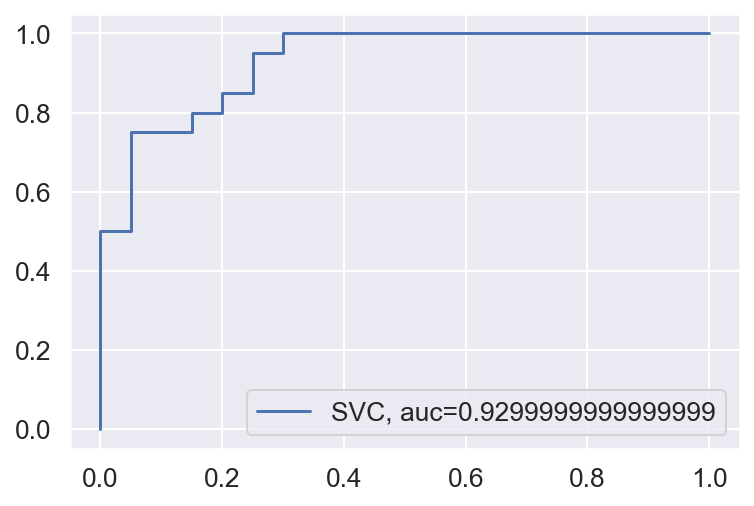

In [46]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
#Roc for SVC

from sklearn import metrics

plt.figure()

#Roc for Random Forest regression

svc_pred_proba = clf.predict_proba(X_test)
svc_pred_proba = svc_pred_proba[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  svc_pred_proba)
auc = metrics.roc_auc_score(y_test, svc_pred_proba)
plt.plot(fpr,tpr,label="SVC, auc="+str(auc))
plt.legend(loc=4)


plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=100)
rf_model = rfc.fit(X_train,y_train)
# predictions
rf_pred = rfc.predict(X_test)

In [48]:
#from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Balanced Accuracy:",balanced_accuracy_score(y_test, rf_pred))

Accuracy: 0.9
Balanced Accuracy: 0.9


In [49]:
from sklearn.model_selection import cross_val_score

rfc_cv_score = cross_val_score(rf_model, x_features, y_dementia, cv=5, scoring='roc_auc')

In [50]:
#https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix === Random Forest Classifier")
print(confusion_matrix(y_test, rf_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix === Random Forest Classifier
[[18  2]
 [ 2 18]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



=== All AUC Scores ===
[0.86625 0.91125 0.93    0.88875 0.93375]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9059999999999999


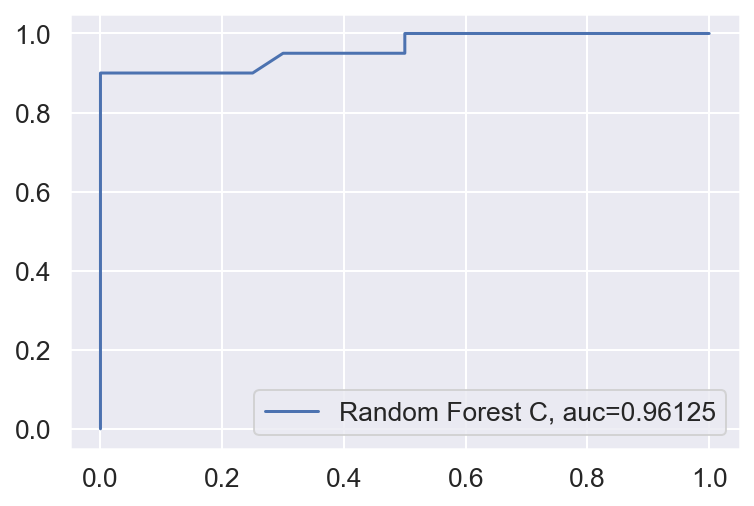

In [51]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
#Roc for logistic regression

plt.figure()

#Roc for Random Forest regression

rf_pred_proba = rf_model.predict_proba(X_test)
rf_pred_proba = rf_pred_proba[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  rf_pred_proba)
auc = metrics.roc_auc_score(y_test, rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest C, auc="+str(auc))
plt.legend(loc=4)


plt.show()

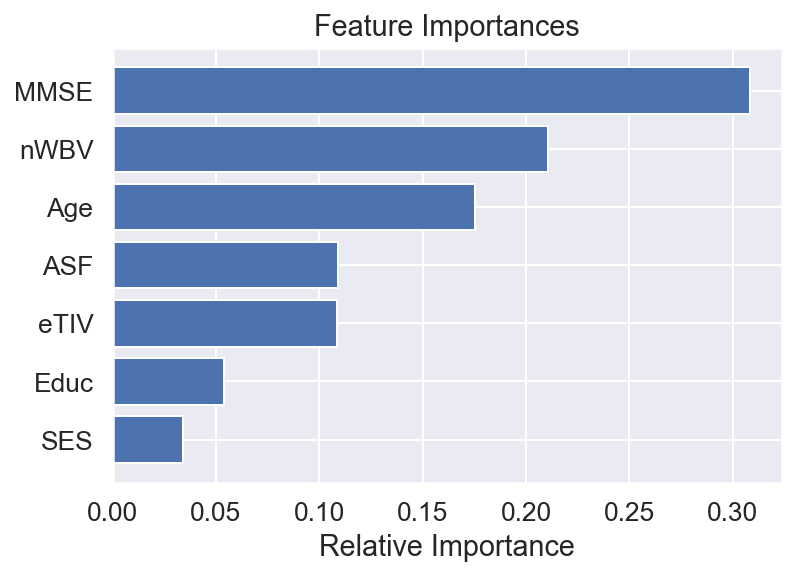

In [52]:
features = feature_cols
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', gamma='auto')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Balanced Accuracy:",balanced_accuracy_score(y_test, y_pred))

Accuracy:  0.8
Balanced Accuracy: 0.8


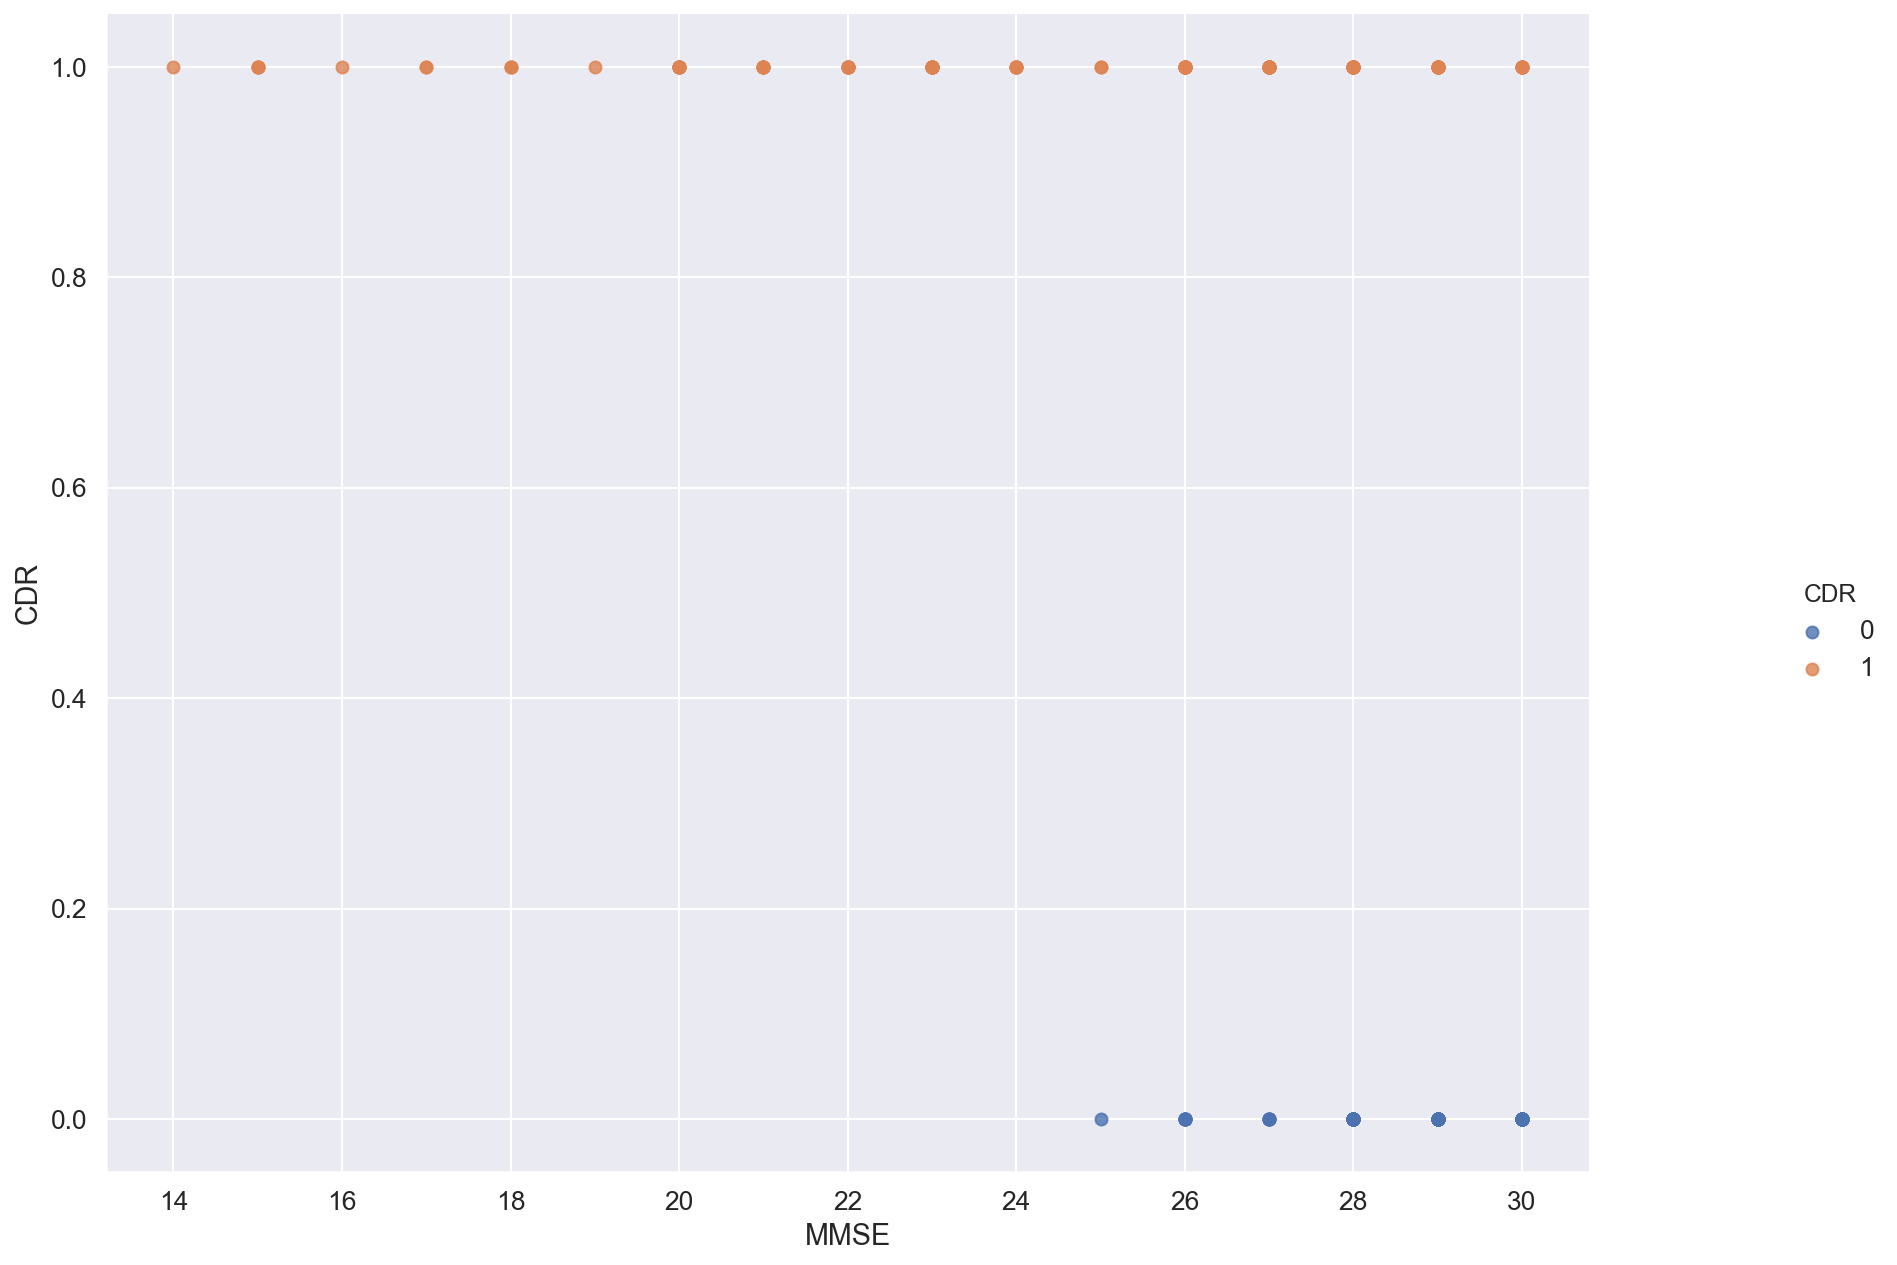

In [54]:
sns.lmplot('MMSE', 'CDR', dementia_data, hue='CDR', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [55]:
print (dementia_data)

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0    OAS1_0001_MR1  F   R    74   2.0   3.0  29.0  0    1344  0.743  1.306
1    OAS1_0002_MR1  F   R    55   4.0   1.0  29.0  0    1147  0.810  1.531
2    OAS1_0003_MR1  F   R    73   4.0   3.0  27.0  1    1454  0.708  1.207
3    OAS1_0010_MR1  M   R    74   5.0   2.0  30.0  0    1636  0.689  1.073
4    OAS1_0011_MR1  F   R    52   3.0   2.0  30.0  0    1321  0.827  1.329
5    OAS1_0013_MR1  F   R    81   5.0   2.0  30.0  0    1664  0.679  1.055
6    OAS1_0015_MR1  M   R    76   2.0   2.0  28.0  1    1738  0.719  1.010
7    OAS1_0016_MR1  M   R    82   2.0   4.0  27.0  1    1477  0.739  1.188
8    OAS1_0018_MR1  M   R    39   3.0   4.0  28.0  0    1636  0.813  1.073
9    OAS1_0019_MR1  F   R    89   5.0   1.0  30.0  0    1536  0.715  1.142
10   OAS1_0020_MR1  F   R    48   5.0   2.0  29.0  0    1326  0.785  1.323
11   OAS1_0021_MR1  F   R    80   3.0   3.0  23.0  1    1794  0.765  0.978
12   OAS1_0022_MR1  F   R